# Bengaluru House Price Prediction
---

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [135]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [136]:
df.shape

(13320, 9)

In [137]:
for col in df.columns:
    print(col.upper(),df[col].dtype)
    print(df[col].value_counts().sort_index())
    print('\n\n------------\n\n')

AREA_TYPE object
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64


------------


AVAILABILITY object
14-Jul                      1
14-Nov                      1
15-Aug                      1
15-Dec                      1
15-Jun                      1
                        ...  
22-Mar                      3
22-May                     10
22-Nov                      2
Immediate Possession       16
Ready To Move           10581
Name: availability, Length: 81, dtype: int64


------------


LOCATION object
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1305, dtype: int64


------------


SIZE object
1 BHK          538
1 Bedroom      

---
## Missing Values

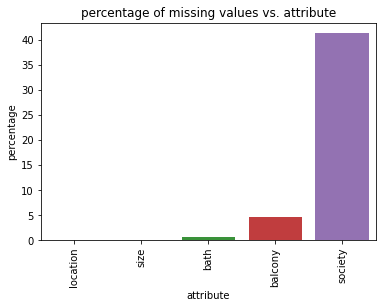

In [138]:
#define percentage missing values
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

percent_nan = percent_missing(df)

#plot barplot
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.title('percentage of missing values vs. attribute')
plt.xlabel('attribute')
plt.ylabel('percentage');

All records having less than 1% missing values are removed. 

In [139]:
df = df.dropna(subset=['location','size','bath'])

---
## Identify relevant features 

- ### area_type

**Used to convert area in total sq.ft into Carpet Area, then dropped.**

FORMULAE USED:

- Carpet Area : 70% Built-Up Area
- Carpet Area : 65% Super Built-Up Area
- Carpet Area : 60% Plot Area

In [140]:
print(df['area_type'].unique())

['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']


In [141]:
#conversion into numerical values required
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [142]:
def sqft_calc(x):
    
    temp = x.split('-')
    if len(temp) == 2:
        return ( float(temp[0]) + float(temp[1]) ) / 2
    
    try:
        return float(x)
    
    except:
        return None

In [143]:
df['total_sqft'] = df['total_sqft'].apply(sqft_calc)

In [144]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00


In [145]:
for i in df.index:
    
    if df['area_type'].loc[i] == 'Super built-up  Area':
        df['total_sqft'].loc[i] *= 0.65
    
    elif df['area_type'].loc[i] == 'Plot  Area':
        df['total_sqft'].loc[i] *= 0.6
    
    elif df['area_type'].loc[i] == 'Built-up  Area':
        df['total_sqft'].loc[i] *= 0.7

C:\Users\imrvh\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [146]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,686.40,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,1560.00,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1008.00,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,988.65,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,780.00,2.0,1.0,51.00


In [147]:
df = df.drop('area_type',axis=1)

- ### availability

In [148]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '18-Apr',
       '20-Aug', '19-Mar', '17-Sep', '18-Dec', '17-Aug', '19-Apr',
       '18-Jun', '22-Dec', '22-Jan', '18-Aug', '19-Jan', '17-Jul',
       '18-Jul', '21-Jun', '20-May', '19-Aug', '18-Sep', '17-May',
       '17-Jun', '18-Oct', '21-May', '18-Jan', '20-Mar', '17-Dec',
       '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb', '19-May',
       '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct', '21-Jan',
       '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul', '21-Nov',
       '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep', '21-Aug',
       '14-Nov', '19-Nov', '15-Nov', '16-Jul', '15-Jun', '17-Feb',
       '20-Nov', '20-Jul', '16-Sep', '15-Oct', '20-Feb', '15-Dec',
       '16-Oct', '22-Nov', '15-Aug', '17-Jan', '16-Nov', '20-Apr',
       '16-Jan', '14-Jul'], dtype=object)

In [149]:
#store ready to move houses
d1 = df[df['availability'].isin(['Ready To Move','Immediate Possession'])]
                           
#store other
d2 = df[(df['availability'] != 'Ready To Move') & (df['availability'] != 'Immediate Possession')]

In [150]:
d1['availability'] = 'ready_to_move'

d2['availability'] = 'other'

<ipython-input-150-46d06a8661ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['availability'] = 'ready_to_move'
<ipython-input-150-46d06a8661ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['availability'] = 'other'


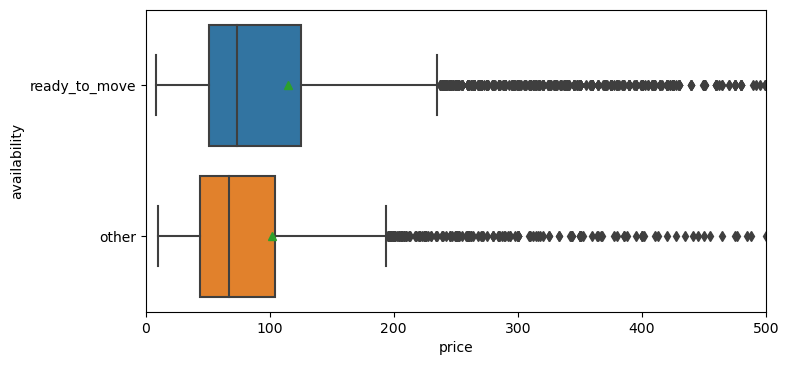

In [151]:
plt.figure(figsize=(8,4),dpi=100)
sns.boxplot(data = pd.concat([d1,d2]), x = 'price', y = 'availability',showmeans=True)
plt.xlim(0,500);

In [152]:
#mean and median of 'Ready to Move' homes
d1['price'].agg(['mean','median'])

mean      115.084932
median     73.950000
Name: price, dtype: float64

In [153]:
#mean and median of other homes
d2['price'].agg(['mean','median'])

mean      101.772058
median     67.000000
Name: price, dtype: float64

**Ready to Move homes appear to sell at higher prices, so the feature is retained.**

- ### location

Location is chosen to predict the house price.

- ### size (BHK)

Size is chosen to predict the house price.

- ### society

In [154]:
df['society'].value_counts()

#2688 societies exist, inclusion into model increases dimensionality greatly

GrrvaGr    80
PrarePa    71
Sryalan    59
Prtates    58
GMown E    56
           ..
Raenti      1
Saisei      1
Saandtt     1
Krine C     1
Sotus L     1
Name: society, Length: 2667, dtype: int64

In [155]:
np.round(100 * df.society.isnull().sum() / len(df),2)

#Moreover, around 40 percent of society field is null, so we drop the column

41.51

In [156]:
df = df.drop('society',axis=1)

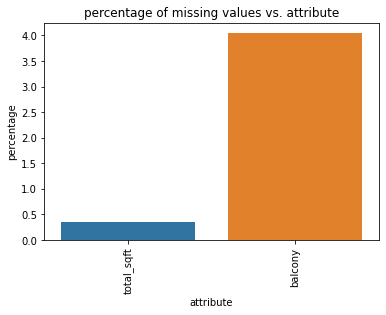

In [157]:
percent_nan = percent_missing(df)

#plot barplot
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.title('percentage of missing values vs. attribute')
plt.xlabel('attribute')
plt.ylabel('percentage');

In [158]:
#null values in total_sqft appear due to conversion from str to float
df = df.dropna(subset=['total_sqft'])

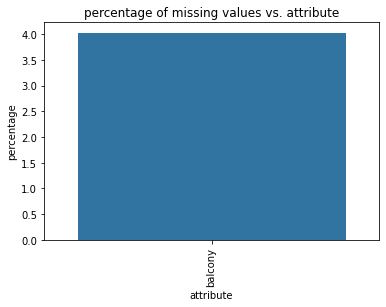

In [159]:
percent_nan = percent_missing(df)

#plot barplot
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.title('percentage of missing values vs. attribute')
plt.xlabel('attribute')
plt.ylabel('percentage');

- ### total_sqft (area in square feet)

area in sq.ft is chosen to predict the house price.

- ### bath (number of bathrooms)

In [160]:
df['bath'].value_counts().sort_index()

#as much as 40 bathrooms exist per house, any discrepancy is to be checked

1.0      781
2.0     6893
3.0     3274
4.0     1222
5.0      521
6.0      269
7.0      102
8.0       64
9.0       41
10.0      13
11.0       3
12.0       7
13.0       3
14.0       1
15.0       1
16.0       2
18.0       1
27.0       1
40.0       1
Name: bath, dtype: int64

In [161]:
#grouping of no. of rooms is required
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [162]:
#before grouping, discard NaN values
df = df.dropna(subset=['size'])

In [163]:
df['size'] = df['size'].str.split().str.get(0).astype(int)

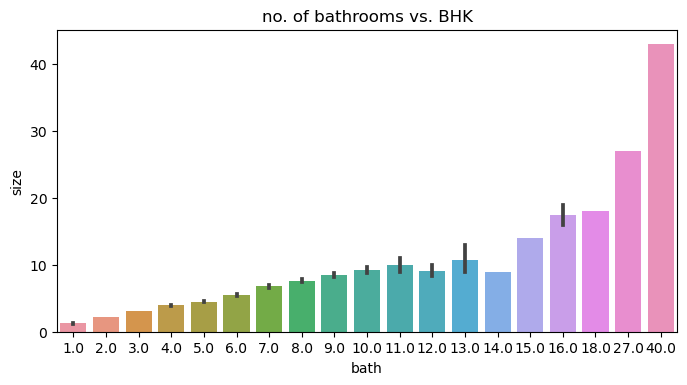

In [164]:
plt.figure(figsize=(8,4),dpi=100)
plt.title('no. of bathrooms vs. BHK')
sns.barplot(data=df,x='bath',y='size');

#there is correlation with no. of rooms

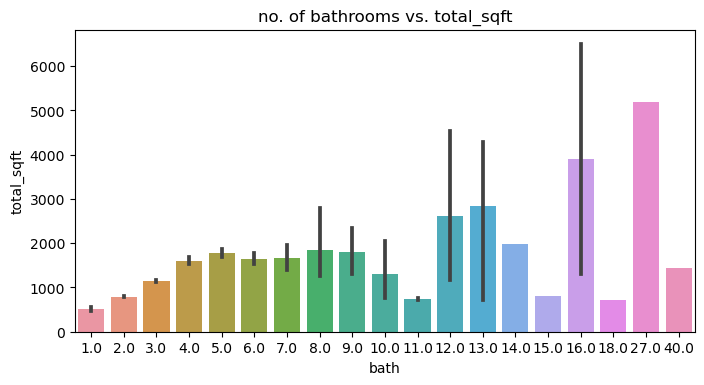

In [165]:
plt.figure(figsize=(8,4),dpi=100)
plt.title('no. of bathrooms vs. total_sqft')
sns.barplot(data=df,x='bath',y='total_sqft');

#no correlation between no. of bathrooms and total_sqft

In [166]:
#remove all rows where number of bathrooms > 4

df = df[df['bath'] <= 4]

In [167]:
df.shape

(12170, 7)

- ### balcony

In [168]:
df['balcony'].value_counts()

2.0    4796
1.0    4711
3.0    1428
0.0     903
Name: balcony, dtype: int64

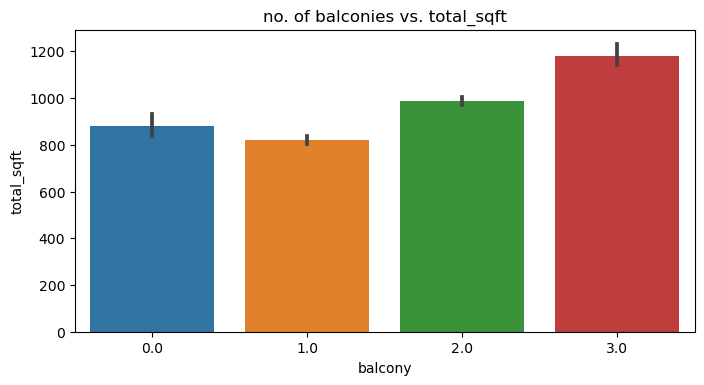

In [169]:
plt.figure(figsize=(8,4),dpi=100)
plt.title('no. of balconies vs. total_sqft')
sns.barplot(data=df,x='balcony',y='total_sqft');

#insufficient information to make judgement

In [170]:
#identify how price correlates with other features
df.corr().transpose()['price']

size          0.454946
total_sqft    0.548672
bath          0.489789
balcony       0.112190
price         1.000000
Name: price, dtype: float64

In [171]:
df = df.drop('balcony',axis=1)

In [172]:
#final set of features used
df.columns

Index(['availability', 'location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

In [173]:
for col in df.columns:
    print(col.upper(),df[col].dtype)
    print(df[col].unique())
    print('\n\n------------\n\n')

AVAILABILITY object
['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '18-Apr' '20-Aug' '19-Mar' '17-Sep'
 '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan' '18-Aug' '19-Jan'
 '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep' '17-May' '17-Jun'
 '18-Oct' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun' '22-Jun'
 '19-Jul' '21-Feb' '19-May' '17-Nov' '20-Oct' '20-Jun' '19-Feb' '21-Oct'
 '21-Jan' '17-Mar' '17-Apr' '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec'
 '22-Mar' '20-Jan' '21-Sep' '21-Aug' '22-May' '14-Nov' '19-Nov' '15-Nov'
 '16-Jul' '15-Jun' '17-Feb' '20-Nov' '20-Jul' '16-Sep' '15-Oct' '20-Feb'
 '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan' '16-Nov' '20-Apr' '16-Jan'
 '14-Jul']


------------


LOCATION object
['Electronic City Phase II' 'Uttarahalli' 'Lingadheeranahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']


------------


SIZE int32
[2 3 4 1 6 5 7 8]


----

---
## Further Preprocessing

In [174]:
df['location'].nunique()

1218

In [175]:
#for one-hot-encoding location values, reduce dimensionality by cleaning
df['location'] = df['location'].apply(lambda x : x.strip())

In [176]:
df['location'].nunique()

1207

In [177]:
location_counts = df['location'].value_counts()

In [178]:
location_counts

Whitefield                                  486
Sarjapur  Road                              368
Electronic City                             301
Kanakpura Road                              259
Thanisandra                                 229
                                           ... 
Banashankari 3rd stage, Vivekanandanagar      1
Sundar Ram Shetty Nagar                       1
Duvasapalya                                   1
Prakash Nagar                                 1
RMC YARD                                      1
Name: location, Length: 1207, dtype: int64

In [179]:
minority_count = location_counts[location_counts <= 10]

In [180]:
minority_count

Gunjur Palya                                10
ITPL                                        10
Cunningham Road                             10
Kodigehalli                                 10
Narayanapura                                10
                                            ..
Banashankari 3rd stage, Vivekanandanagar     1
Sundar Ram Shetty Nagar                      1
Duvasapalya                                  1
Prakash Nagar                                1
RMC YARD                                     1
Name: location, Length: 987, dtype: int64

In [181]:
#group locations having less than 10 homes sold
df['location'] = df['location'].apply(lambda x : 'other' if x in minority_count else x)

In [182]:
df['location'].value_counts()
#dimension reduced to 221

other                 2696
Whitefield             486
Sarjapur  Road         368
Electronic City        301
Kanakpura Road         259
                      ... 
NRI Layout              11
Giri Nagar              11
Neeladri Nagar          11
Pattandur Agrahara      11
Marsur                  11
Name: location, Length: 221, dtype: int64

In [183]:
df.shape

(12170, 6)

In [184]:
#calculate price_per_sq_ft for further processing
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']

In [185]:
df.describe()

,size,total_sqft,bath,price,price_per_sqft
count,12170.000000,12170.000000,12170.000000,12170.000000,1.217000e+04
mean,2.566064,952.762025,2.405670,96.371840,1.152690e+04
std,0.816432,680.191576,0.755195,105.784209,1.818611e+05
min,1.000000,0.600000,1.000000,8.000000,4.463830e+02
25%,2.000000,715.000000,2.000000,48.000000,6.388204e+03
50%,2.000000,826.800000,2.000000,68.000000,8.026219e+03
75%,3.000000,1054.300000,3.000000,105.000000,1.054099e+04
max,8.000000,31363.200000,4.000000,2600.000000,2.000000e+07


In [186]:
#eliminate records having impractical area to sq.ft ratio
df = df[((df['total_sqft']/df['size']) >= 300)]

In [187]:
df.shape

(9860, 7)

In [188]:
df.head()

,availability,location,size,total_sqft,bath,price,price_per_sqft
0,19-Dec,Electronic City Phase II,2,686.40,2.0,39.07,5692.016317
2,Ready To Move,Uttarahalli,3,1008.00,2.0,62.00,6150.793651
3,Ready To Move,Lingadheeranahalli,3,988.65,3.0,95.00,9609.062864
4,Ready To Move,Kothanur,2,780.00,2.0,51.00,6538.461538
5,Ready To Move,Whitefield,2,760.50,2.0,38.00,4996.712689


In [189]:
#for each location, retain only those records whose price is within one std dev. of the entire sample price distribution

def remove_outliers_sqft(df):
    df_output = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        
        st = np.std(subdf.price_per_sqft)
        
        gen_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_output = pd.concat([df_output,gen_df],ignore_index=True)
    return df_output

In [190]:
df = remove_outliers_sqft(df)

df.describe()

,size,total_sqft,bath,price,price_per_sqft
count,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000
mean,2.420258,967.324245,2.347487,85.149745,8397.526475
std,0.689896,496.357861,0.695790,66.620945,2900.175815
min,1.000000,300.000000,1.000000,10.000000,2826.086957
25%,2.000000,734.500000,2.000000,50.000000,6503.684632
50%,2.000000,858.000000,2.000000,68.000000,7857.142857
75%,3.000000,1084.175000,3.000000,97.790000,9636.610423
max,6.000000,18240.000000,4.000000,2100.000000,29761.904762


In [192]:
df.shape

(7819, 7)

In [198]:
def bhk_outlier_removal(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        size_stats = {}
        for size, size_df in location_df.groupby('size'):
            size_stats[size] = {
                
                'mean':np.mean(size_df.price_per_sqft),
                'std':np.std(size_df.price_per_sqft),
                'count':size_df.shape[0]
            } #calculate stats for each location for each size (BHK)
            
        for size, size_df in location_df.groupby('size'): 
            stats = size_stats.get(size-1)
            if stats and stats['count'] > 5: #if size exists and contains atleast 5 records 
                exclude_indices = np.append(exclude_indices,size_df[size_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index') 

#if price of home of BHK x is less than the mean price of home of BHK x-1, drop record

In [199]:
df = bhk_outlier_removal(df)

In [200]:
df.shape

(5710, 7)

In [202]:
df.describe()

,size,total_sqft,bath,price,price_per_sqft
count,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000
mean,2.349212,950.639959,2.302977,90.550891,8978.382475
std,0.700783,522.722197,0.710240,73.486012,3054.038123
min,1.000000,300.000000,1.000000,10.000000,2826.086957
25%,2.000000,720.200000,2.000000,50.742500,7018.605837
50%,2.000000,832.000000,2.000000,72.010000,8571.428571
75%,3.000000,1082.250000,3.000000,105.000000,10195.631128
max,6.000000,18240.000000,4.000000,2100.000000,29761.904762


In [203]:
#remove price_per_sq_ft column after processing
df = df.drop('price_per_sqft',axis=1)

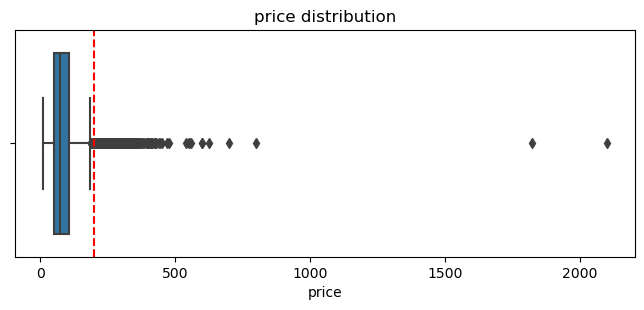

In [204]:
plt.figure(figsize=(8,3),dpi=100)
plt.title('price distribution')
sns.boxplot(data=df,x='price')
plt.axvline(x=200, color='r', linestyle='--');

#final dataset contains outliers, at prices > 2 Crores

In [205]:
len(df[df['price'] > 200]) 

320

In [206]:
df = df[df['price'] <= 200]

In [207]:
#custom encode 'availability' before saving csv
for i in df.index:
    if df['availability'].loc[i] != 'Ready To Move':
        df['availability'].loc[i] = 0
    else:
        df['availability'].loc[i] = 1

C:\Users\imrvh\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [2062]:
df.to_csv('Clean_Bengaluru_House_Data.csv')

---
## Train Model

In [2063]:
X = df.drop('price',axis=1)
y = df['price']

In [2064]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2065]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 28)

In [2066]:
transformer = make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')

In [2067]:
scaler = StandardScaler()

### ElasticNet - Regularization

In [2068]:
base_elastic_model = ElasticNet()

In [2069]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [2070]:
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=5,
                          verbose=2)

In [2071]:
pipe = make_pipeline(transformer,scaler,grid_model)

In [2072]:
pipe.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1,

[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.0s
[CV] END ...................

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=ElasticNet(),
                              param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                                          'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95,
                                                       0.99, 1]},
                              scoring='neg_root_mean_squared_error',
                              verbose=2))])

In [2073]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.9)

In [2074]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.9}

In [2075]:
y_pred = pipe.predict(X_test)

In [2076]:
#measures extent of explainability of target using model's features
r2_score(y_test,y_pred)

0.8373583542722149

In [2077]:
mean_absolute_error(y_test,y_pred)

10.3679800429854

In [2078]:
#large difference in RMSE and MAE indicates outlier's effect
np.sqrt(mean_squared_error(y_test,y_pred))

14.845681152486211

**Benchmark for LR model - RMSE must be within 20% of Average Price**

In [2079]:
0.2 * df['price'].mean()

15.565921706864541

In [2080]:
np.set_printoptions(precision=0)
print(np.concatenate((pd.DataFrame(y_test),pd.DataFrame(y_pred)),1)[:11])

[[ 39.  41.]
 [155. 135.]
 [ 56.  48.]
 [ 53.  69.]
 [ 88. 100.]
 [ 70.  76.]
 [ 59.  81.]
 [ 35.  34.]
 [ 85.  82.]
 [100. 127.]
 [ 77.  84.]]


---

## Assumptions

**Linear and Additive Relationship**

In [211]:
df.columns

Index(['availability', 'location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

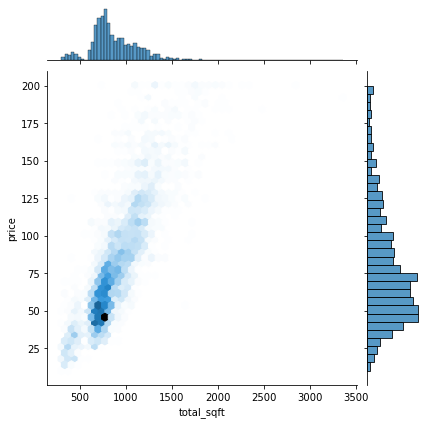

In [218]:
sns.jointplot(data=df,x='total_sqft',y='price',kind='hex');

**Autocorrelation and Heteroskedasticity**

Error terms must not be correlated. Additionally, constant variance in error terms is required 

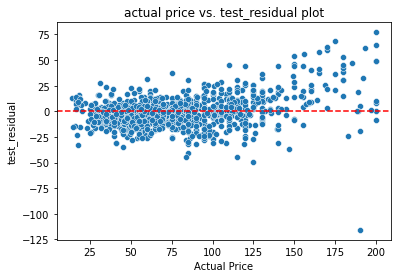

In [2081]:
#residual plot to check for patterns
test_res = y_test - y_pred
sns.scatterplot(x=y_test,y=test_res)
plt.xlabel('Actual Price')
plt.ylabel('test_residual')
plt.title('actual price vs. test_residual plot')
plt.axhline(y=0, color='r', linestyle='--');

**Multicollinearity**

independent variables must not be correlated

In [221]:
df.columns

Index(['availability', 'location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

In [223]:
df.drop('price',axis=1).corr()
#consider only independent variables

,size,total_sqft,bath
size,1.000000,0.850818,0.860564
total_sqft,0.850818,1.000000,0.811602
bath,0.860564,0.811602,1.000000


**Normal Distribution of error terms**

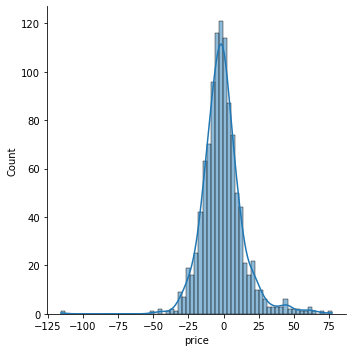

In [2082]:
#normality check
sns.displot(test_res,kde=True);

---
### Load Model

In [2083]:
import pickle

In [2084]:
pickle.dump(pipe, open('model.pkl','wb'))

---